In [2]:
import numpy as np

import matplotlib.pyplot as plt

In [3]:
import scipy.stats as stats


def compute_cells(ells, cls, lmin = 10, lmax = 4000, delta_ell = 30):
    
        bins = np.arange(lmin, lmax, delta_ell)

        sums = stats.binned_statistic(ells, ells, statistic='sum', bins = bins)
        cl = stats.binned_statistic(ells, ells*cls, statistic='sum', bins = bins)
        cl = cl[0] / sums[0]
        
        ells = (bins[1:]+bins[:-1])/2.0

        return ells, cl

In [6]:
lmin = 10
lmax = 4000
delta_ell = 30

func = lambda cl: compute_cells(ells, cl, lmin = lmin, lmax = lmax, delta_ell = delta_ell)

In [82]:
ells, clkk_rec, clkk_input, cl_kk_input_output, clkg_fg_auto, clkg_fg_masked_auto, clkg_input, clkg_rec, clkg_masked_rec = np.loadtxt('sehgalconfig/spectra.txt', unpack = True)

_, _, _, _, _, _, clkg_input_weighted, clkg_rec_weighted, clkg_masked_rec_weighted = np.loadtxt('sehgalconfig/spectra_qe_weighted.txt', unpack = True)

In [16]:
from camb.sources import GaussianSourceWindow, SplinedSourceWindow

import camb

from camb import model as cmodel

import argparse

import pathlib

import read_config

import numpy as np

from orphics import cosmology

configuration = 'sehgalconfig.yaml'

config = read_config.ConfigurationCosmoReader(configuration)

direc = '/global/homes/o/omard/actxdes/pipeline/measure/explore/output/'
z, nz = np.loadtxt(direc+'galaxy_z_nz_0.2-0.4.txt', unpack = True)


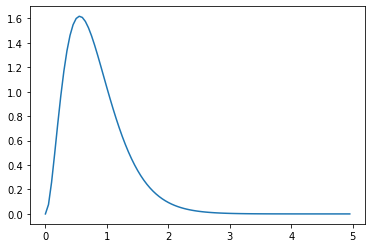

In [76]:
z0 = 0.24
unnorm_lsst_func = lambda z: 1/(2*z0)*(z/z0)**2*np.exp(-z/z0)
z = np.arange(0, 5, 0.05)
norm = np.trapz(unnorm_lsst_func(z), z)
bias_lsst = lambda z: 1+0.84*z
lsst_func = lambda z: unnorm_lsst_func(z)*bias_lsst(z)/norm
plt.plot(z, lsst_func(z))
np.savetxt('sehgalconfig/lsst.txt', np.c_[z, unnorm_lsst_func(z)/norm])

In [18]:
defaultCosmology = {'omch2': 0.1198
                    ,'ombh2': 0.02225
                    ,'H0': 67.3
                    ,'ns': 0.9645
                    ,'As': 2.2e-9
                    ,'mnu': 0.06
                    ,'w0': -1.0
                    ,'tau':0.06
                    ,'nnu':3.046
                    ,'wa': 0.
                    ,'Ysig': 0.127
                    ,'gammaYsig': 0.
                    ,'betaYsig': 0.
                    ,'Y_star': 2.42e-10
                    ,'alpha_ym': 1.79
                    ,'b_ym': 0.8
                    ,'beta_ym': 0.0
                    ,'b_wl': 1.
                    ,'gamma_ym': 0.0
}

defaultCosmology['H0'] = config.H0
defaultCosmology['ombh2'] = config.ombh2
defaultCosmology['omch2'] = config.omch2
defaultCosmology['ns'] = config.ns
defaultCosmology['As'] = config.As

lc = cosmology.LimberCosmology(paramDict = defaultCosmology, lmax = config.lmax, nonlinear = True)

Generating theory Cls...
initializing power...
Initializing CMB window..


In [20]:
lc.addNz(tag = "g", zs = z, nz = nz, ignore_exists = True)

('Initializing galaxy window for ', 'g', ' ...')


In [51]:
zz, nzz = np.loadtxt('sehgalconfig/sehgalnz.txt', unpack = True)
lc.addNz(tag = 'gsehgal', zs = zz, nz = nzz)

('Initializing galaxy window for ', 'gsehgal', ' ...')


In [73]:
lc.addNz(tag = 'lsst', zs = z, nz = lsst_func(z), ignore_exists = True)

('Initializing galaxy window for ', 'lsst', ' ...')


In [59]:
normsehgal = np.trapz(nzz, zz)

In [74]:
ls = np.arange(0, config.lmax, 1)
lc.generateCls(ls)
clkk = lc.getCl("cmb", "cmb")
clkg = lc.getCl("cmb", "g")
clkgsehgal = lc.getCl("cmb", "gsehgal")
clkglsst = lc.getCl("cmb", "lsst")
clgg = lc.getCl("g", "g")

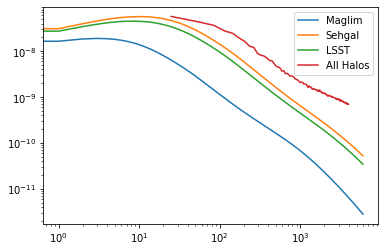

In [83]:
plt.loglog(ls, clkg, label = 'Maglim')
plt.loglog(ls, clkgsehgal, label = 'Sehgal')
plt.loglog(ls, clkglsst, label = 'LSST')
plt.plot(*func(clkg_input), label = 'All Halos')
plt.legend()

In [80]:
z, nz = np.loadtxt(direc+'galaxy_z_nz_0.2-0.4.txt', unpack = True)
total_number = np.trapz(nz, z)

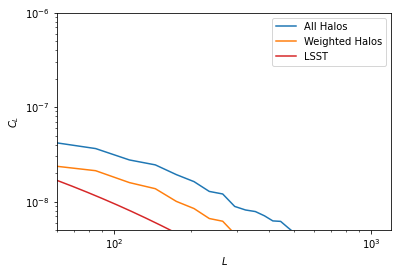

In [89]:
plt.plot(*func(clkg_input), label = 'All Halos')
plt.plot(func(clkg_input_weighted)[0], func(clkg_input_weighted)[1], label = 'Weighted Halos')
#plt.plot(*compute_cells(ls, clkg, lmin = lmin, lmax = lmax, delta_ell = delta_ell), ls = '--', label = 'Binned Theory for Weighted')
plt.plot(ls, clkg)
plt.loglog(ls, clkglsst, label = 'LSST')

plt.yscale('log')
plt.xscale('log')
plt.ylabel('$C_L$')
plt.xlabel('$L$')
plt.ylim(5e-9, 1e-6)
plt.xlim(60, 1200)
plt.legend()
plt.show()
plt.close()

In [26]:
cls_list = [clkk_rec, clkk_input, cl_kk_input_output, clkg_fg_auto, clkg_fg_masked_auto, clkg_input, clkg_rec, clkg_masked_rec]


func = lambda cl: compute_cells(ells, cl, lmin = lmin, lmax = lmax, delta_ell = delta_ell)

computed = list(map(func, cls_list))

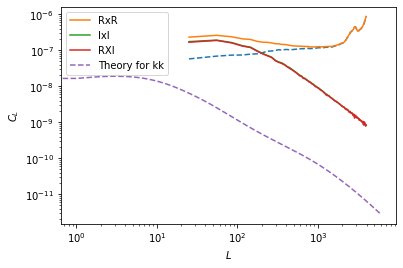

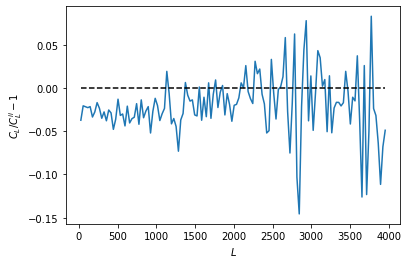

In [27]:
kk_rec, kk_input, kk_input_output = computed[:3]
el, kk_rec_B = kk_rec
el, kk_input_B = kk_input
el, kk_input_output_B = kk_input_output


plt.plot(el, kk_rec_B-kk_input_B, ls = '--')
plt.plot(*kk_rec, label = 'RxR')
plt.plot(*kk_input, label = 'IxI')
plt.plot(*kk_input_output, label = 'RXI')
plt.plot(ls, clkg, ls = '--', label = 'Theory for kk')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('$C_L$')
plt.xlabel('$L$')
plt.legend()
plt.show()
plt.close()

plt.plot(el, kk_input_output_B/kk_input_B-1)
plt.plot(el, el*0., color = 'black', ls = '--')
plt.ylabel('$C_L/C^{ii}_L-1$')
plt.xlabel('$L$')
plt.show()
plt.close()


In [ ]:
plt.loglog(*kk_input, label = 'IxI')
plt.loglog(*compute_cells(ls, clkk, lmin = lmin, lmax = lmax, delta_ell = delta_ell), ls = '--', label = 'Binned Theory for kk')
plt.loglog(ls, clkk)
plt.legend()

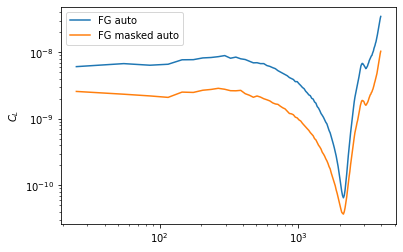

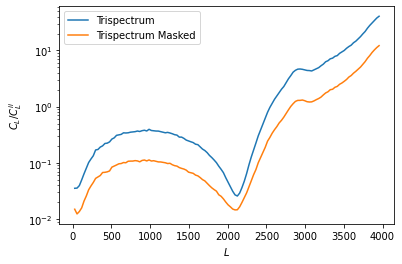

In [35]:
#cls_list = [clkk_rec, clkk_input, cl_kk_input_output, clkg_fg_auto, clkg_fg_masked_auto, clkg_input, clkg_rec, clkg_masked_rec]

kg_fg_auto, kg_fg_masked_auto = computed[3:5]

el, kg_fg_auto_B = kg_fg_auto
el, kg_fg_masked_auto_B = kg_fg_masked_auto

plt.plot(*kg_fg_auto, label = 'FG auto')
plt.plot(*kg_fg_masked_auto, label = 'FG masked auto')
plt.ylabel('$C_L$')

plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()
plt.close()


plt.plot(el, kg_fg_auto_B/kk_input_B, label = 'Trispectrum')
plt.plot(el, kg_fg_masked_auto_B/kk_input_B, label = 'Trispectrum Masked')
plt.plot(el, el*0., color = 'black', ls = '--')
plt.ylabel('$C_L/C^{ii}_L$')
plt.xlabel('$L$')
plt.legend()
plt.yscale('log')
plt.show()
plt.close()


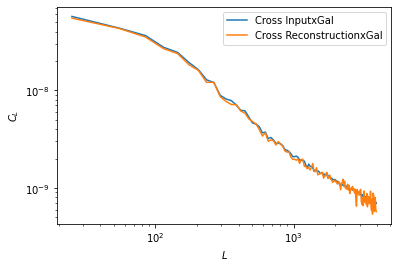

In [36]:
kg_input, kg_rec, kg_masked_rec = computed[5:]

plt.plot(*kg_input, label = 'Cross InputxGal')
plt.plot(*kg_rec, label = 'Cross ReconstructionxGal')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.ylabel('$C_L$')
plt.xlabel('$L$')
plt.show()
plt.close()